<div style="text-align: right"> Mark Hendricks </div>

<left>FINM 36700 - Portfolio Theory and Risk Management</left> 
<br>
<left>Fall 2023</left>

<h2><center> Homework #5- Smart Beta ETF and Factor Investing </center></h2>

<center>Due: Monday, Oct 30 at 6PM</center>

<h3><span style="color:#00008B">Name - Nick Lewis</span></h3>
<h3><span style="color:#00008B">Email - nicklewis16@uchicago.edu</span></h3>

# 1. The Case
*This section will not be graded but it will be discussed in class*

**1.1 Describe how each of the factors (other than MKT) is measured. That is, each factor is a portfolio of stocks- which stocks are included in the factor portfolio?**

- Size: (SMB) small firms minus big firms
- Value: (HML) decile portfolio with highest B/M ratios less decile portfolio w lowest B/M ratios
- Profitability: (RMW) decile portfolio most robust profitability less decile portfolio weakest profitability
- Investment: (CMA) decile portfolio w most conservative levels of investment spending less decile portfolio w most aggressive investment spending
- Momentum

Idea: long-short factor portfolio constructed by taking returns on the decile w the highest average return less the returns on decile with lowest average return

**1.2 Is the factor portfolio...**\
**- long-only**\
**- long-short**\
**- value-weighted**\
**- equally-weighted**

Bottom up approach, weighting each stock in the multifactor index by the set of its fundamental valuation characteristics, the Z-scores.

**1.3 What steps are taken in the factor construction to try to reduce the correlation between the factors?**

**1.4 What is the point of figures 1-6?**

- **Figure 1**:(CAPM Hypothesis) Average returns on five portfolios ranked by size of their market Beta using 1964-2014 data.
    - Shows no evidence of a strong upward sloping relation between portfolio beta and average return--> contradicts prediction of CAPM
    - FF concluded CAPM theory doesn't explain average returns very well
- **Figure 2**:(SIZE Factor) Average returns of portfolios grouped into quintiles by their market cap
    - Shows the small firm effect: small firms have higher avg returns than large firms, with consistent rise in avg returns as we go from smallest to the largest firm's portfolio
    - Not obvious why but some ideas:
        - Size related to firm's profitability; small firms have lower earnings on assets than big firms
        - Small firms' stocks don't trade as often, less liquid, investors require higher returns for accepting this liquidity risk
        - Size correlation to information uncertainty- small firms not followed by IBs while having more volatile fundamentals
- **Figure 3**:(VALUE Factor) Average returns of five portfolios created by ranking stocks by their Book-to-Market ratio (B/M) and sorting into quintile portfolios from low to high.
    - Shows that portfolios with higher B/M ratios have higher average returns --> deemed the value effect
    - Fama French argue:
        - high B/M stocks less profitable, relatively distressed, so these are riskier and have higher avg ret to reflect that
        - low B/M stocks have high returns on cap with sustained profitability; less risky and have lower average returns
        - "When a firm's market value is low relative to its book value, then a stock purchaser acquires a relatively large quantity of book assets for each dollar spent on the firm. When a firm's market price is high relative to its book value the opposite is true"
- **Figure 4**:(QUALITY Factor) Average returns of five portfolios sorted from low to  high profitability
    - Profitability: ratio of firm's operating profit to its book value: firms ranked by this then sorted into quintile portfolios. 
    - More profitable firms earn significantly higher average returns than less profitable firms
    - Argument:
        - Firms w productive assets should should have higher returns than firms with unproductive assets
- **Figure 5**:(QUALITY Factor)  % change in value of firm's assets over the course of a year
    - Investment: ranked by 5 growth, sorted into quintile portfolio, from conservative to aggressive.
    - Portfolios with conservative levels of investment have higher average returns than aggressive firms
    - Argument: 
        - Holding revenues constant, a rise in firm's investment implies lower future expected earnings and thus lower expected returns.
        - Lower levels of investment are higher quality firms bc not depressing their earnings via excessive investment, less balance sheet stress
- **Figure 6**:(MOMENTUM Factor) Quintile portfolios based on stock price appreciation in prev year, loser = bottom 20%, winner = top 20%
    - ** Separate from Fama French **
    - Figure shows greater the price appreciated for a portfolio over the last year, the higher that portfolio's avg return
    - Fama French found controlling for market, size, value, profitability, investment factrs, that momentum had no significance in determining average returns. Others find their evidence inconclusive and continue to see relevance of momentum. 

Views on momentum:
- "Markets are efficient" school of thought (rational) holds that firms w high momentum face greater cash flow risks and/ or higher discount rates bc the nature of their investment sets
- "Markets are inefficient" school of thought (behavioralist) holds that momentum effects is a result of investors' cognitive biases. Herding behavior. 

**1.5 How is a "smart beta" ETF different from a traditional ETF?**

- Traditional ETF: portfolio weights based on market cap of a stock (stock price * # outstanding shares)
- Smart Beta ETF: portfolio weighting scheme based on firm's financial characteristics/ properties of their stock returns. Provides exposure to fundamental factors that had been historically significant in driving stock returns. Proxy for factor portfolios

- Smart Beta considered passive and active
    - Passively mimic the factor indexes, dont require PM input, but are active because their weights deviate from standard market capitalization weights

**1.6 Is it possible for all investors to have exposure to the "value" factor?**

**1.7 How does factor investing differ from traditional diversification?**

- Traditional diversification: diversify investments by asset class
- Factor investing: diversify across factor portfolios (Smart Beta ETFs)

Intuition behind factor investing:

Standard diversification strategy that emphasizes asset classes may not have optimal exposures to the factors that are known to yield high average returns over time. Factor investment portfolio brings different cyclicality of factors together mitigating the effect of changing business conditions.

Example:
- Returns and risks of size and value factors are highest in early part of an economic expansion, while momentum and quality factors are highest at beginning of an economic contraction
- Quality and momentum factors outperform in declining interest rate environments, while value and size outperform with rising rates

# IMPORTS

In [57]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.regression.rolling import RollingOLS
from functools import partial
import sys
import math
pd.options.display.float_format = "{:,.4f}".format
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings("ignore")
import os
from scipy.stats import norm
%matplotlib inline
sns.set(rc={'figure.figsize':(15, 6)})

import matplotlib.pyplot as plt
import matplotlib.cm as cm

# HELPER FUNCTIONS

In [12]:
def performance_summary(return_data, period=12):
    """ 
    Returns the Performance Stats for given set of returns
    Inputs: 
        return_data - DataFrame with Date index and Monthly Returns for different assets/strategies.
    Output:
        summary_stats - DataFrame with annualized mean return, volatility, sharpe ratio, skewness, excess kurtosis, 
                        VaR (0.05), CVaR (0.05), and drawdown based on monthly returns. 
    """
    summary_stats = return_data.mean().to_frame('Mean') * period
    summary_stats['Volatility'] = return_data.std() * np.sqrt(period)
    summary_stats['Sharpe Ratio'] = summary_stats['Mean'] / summary_stats['Volatility']
    summary_stats['Skewness'] = return_data.skew()
    summary_stats['Excess Kurtosis'] = return_data.kurtosis() - 3 # Subtracting 3 to convert kurtosis to excess kurtosis.
    summary_stats['VaR (0.05)'] = return_data.quantile(0.05, axis=0)
    summary_stats['CVaR (0.05)'] = return_data[return_data <= return_data.quantile(0.05, axis=0)].mean()
    summary_stats['Min'] = return_data.min()
    summary_stats['Max'] = return_data.max()
    
    wealth_index = 1000 * (1 + return_data).cumprod()
    previous_peaks = wealth_index.cummax()
    drawdowns = (wealth_index - previous_peaks) / previous_peaks

    summary_stats['Max Drawdown'] = drawdowns.min()
    summary_stats['Peak'] = [previous_peaks[col][:drawdowns[col].idxmin()].idxmax() for col in previous_peaks.columns]
    summary_stats['Bottom'] = drawdowns.idxmin()
    
    recovery_date = []
    for col in wealth_index.columns:
        prev_max = previous_peaks[col][:drawdowns[col].idxmin()].max()
        recovery_wealth = pd.DataFrame([wealth_index[col][drawdowns[col].idxmin():]]).T
        recovery_date.append(recovery_wealth[recovery_wealth[col] >= prev_max].index.min())
    summary_stats['Recovery'] = recovery_date
    
    return summary_stats


In [13]:
def regression_based_performance(factor,fund_ret,rf,constant = True, period = 12):
    """ 
        Returns the Regression based performance Stats for given set of returns and factors
        Inputs:
            factor - Dataframe containing monthly returns of the regressors
            fund_ret - Dataframe containing monthly excess returns of the regressand fund
            rf - Monthly risk free rate of return
        Output:
            summary_stats - (Beta of regression, treynor ratio, information ratio, alpha). 
    """
    if constant:
        X = sm.tools.add_constant(factor)
    else:
        X = factor
    y=fund_ret
    model = sm.OLS(y,X,missing='drop').fit()
    
    if constant:
        beta = model.params[1:]
        alpha = round(float(model.params['const']),6) *period

        
    else:
        beta = model.params
    treynor_ratio = ((fund_ret - rf).mean()*period)/beta[0]
    tracking_error = (model.resid.std()*np.sqrt(period))
    if constant:        
        information_ratio = model.params[0]*period/tracking_error
    r_squared = model.rsquared
    if constant:
        return (beta,treynor_ratio,information_ratio,alpha,r_squared,tracking_error,model.resid)
    else:
        return (beta,treynor_ratio,r_squared,tracking_error,model.resid)

In [14]:
def tangency_portfolio_rfr(asset_return,cov_matrix):
    """ 
        Returns the tangency portfolio weights in a (1 x n) vector when a riskless assset is available
        Inputs: 
            asset_return - Excess return over the risk free rate for each asset (n x 1) Vector
            cov_matrix = nxn covariance matrix for the assets
    """
    asset_cov = np.array(cov_matrix)
    inverted_cov= np.linalg.inv(asset_cov)
    one_vector = np.ones(len(cov_matrix.index))
    
    den = (one_vector @ inverted_cov) @ (asset_return)
    num =  inverted_cov @ asset_return
    return (1/den) * num

In [15]:
def time_series_regression(portfolio, factors, FF3F = False, resid = False, scale =12):
    '''
    Input portfolio (columns of funds to be regressed), and factors.
    This function returns the portfolio columns as index, and regression estimates as columns
    If factors contain Fama-French 3 Factors, (Size and Value), then includes those betas.
    If resid = True, then we return the residual of each column in portfolio indexed by time
    '''
    
    report = pd.DataFrame(index = portfolio.columns)
    residual = pd.DataFrame(columns= portfolio.columns)

    for col in portfolio.columns:
        fund_ret = portfolio[col]
        model = sm.OLS(fund_ret, sm.add_constant(factors), missing= 'drop').fit()
        report.loc[col, 'Alpha'] = model.params['const'] * scale
        report.loc[col, 'Market Beta'] = model.params[1]
        if FF3F:
            report.loc[col, 'Size Beta'] = model.params[2]
            report.loc[col, 'Value Beta'] = model.params[3]
        report.loc[col, 'Information Ratio'] = np.sqrt(scale) * model.params['const'] / model.resid.std()
        report.loc[col, 'Treynor Ratio'] = scale * portfolio[col].mean() / model.params[1]
        report.loc[col, 'R-Squared'] = model.rsquared
        report.loc[col, 'Tracking Error'] = (model.resid.std()*np.sqrt(scale))  
        if resid:
            residual[col] = model.resid
    if resid:
        return residual
    return report

# READ-IN DATA

*Note: Everything is already in excess returns*

In [16]:
short_names = pd.read_excel('/Users/yiningqu/Desktop/factor_pricing_data.xlsx', sheet_name= 'descriptions', index_col= 'Unnamed: 0')
factors = pd.read_excel('/Users/yiningqu/Desktop/factor_pricing_data.xlsx', sheet_name= 'factors (excess returns)', index_col= 'Date')
portfolios = pd.read_excel('/Users/yiningqu/Desktop/factor_pricing_data.xlsx', sheet_name= 'portfolios (excess returns)', index_col= 'Date')
rf = pd.read_excel('/Users/yiningqu/Desktop/factor_pricing_data.xlsx', sheet_name= 'risk-free rate', index_col= 'Date')

# 2. The Factors
#### Use the data found in `'factor_pricing_data.xlsx'`
- FACTORS: Monthly **excess** return data for the overall equity market, $\tilde{r}^{\textnormal{mkt}}$. The sheet also contains data on five additional factors. All factor data is already provided as **excess returns**.

## 2.1 Analyze the factors, similar to how you analyzed the three Fama-French factors in Homework 4. You now have three additional factors, so let's compare there univariate statistics.
**- Mean**\
**- Volatility**\
**- Sharpe**

In [19]:
factor_summary = performance_summary(factors)
#Mean, Volatility, Sharpe Ratio, Skewness, Excess Kurtosis, VaR (0.05), CVaR (0.05), Min, Max, Max Drawdown, Peak, Bottom, Recovery
factor_summary[['Mean', 'Volatility', 'Sharpe Ratio']]

,Mean,Volatility,Sharpe Ratio
MKT,0.0846,0.1573,0.5376
SMB,0.0112,0.1005,0.1115
HML,0.0253,0.1102,0.2299
RMW,0.0465,0.0834,0.5578
CMA,0.0325,0.0734,0.4428
UMD,0.0609,0.1555,0.3918


## 2.2 Based on the factor statistics above, answer the following.
    (a) Does each factor have a positive risk premium (positive expected excess return)?
    (b) How have the factors performed since the time of the case, (2015-present)?

In [381]:
recent_performance = performance_summary(factors['2015':])
recent_performance[['Mean', 'Volatility', 'Sharpe Ratio']]

,Mean,Volatility,Sharpe Ratio
MKT,0.111705,0.162705,0.686549
SMB,-0.008377,0.098268,-0.085244
HML,-0.025817,0.135825,-0.190080
RMW,0.048594,0.073131,0.664483
CMA,0.001794,0.086965,0.020631
UMD,0.006501,0.144006,0.045144


In general, all factors demonstrate positive risk premia because their mean value is greater than 0. Note that MKT factor exhibits the highest risk premia in every time period and size delivered the smallest risk premia. Another thing of note is that UMD, the momentum factor, had the second largest risk premia over the entire timeframe. Most of this risk premia seems to have occurred in the period of 1980 - 2001. 

Since the time of the case, the size and value factor have had negative risk premia. Also, CMA and UMD have had declines in their risk premia from the previous time period. MKT continues to have high risk premium, and is even greater than its historical average over the time frame. 

,Mean Pre,Volatility Pre,Sharpe Ratio Pre,Mean Post,Volatility Post,Sharpe Ratio Post
MKT,0.0779,0.1561,0.4992,0.1117,0.1627,0.6865
SMB,0.0160,0.1011,0.1583,-0.0084,0.0983,-0.0852
HML,0.0379,0.1028,0.3685,-0.0258,0.1358,-0.1901
RMW,0.0460,0.0858,0.5362,0.0486,0.0731,0.6645
CMA,0.0400,0.0696,0.5751,0.0018,0.0870,0.0206
UMD,0.0743,0.1581,0.4697,0.0065,0.1440,0.0451


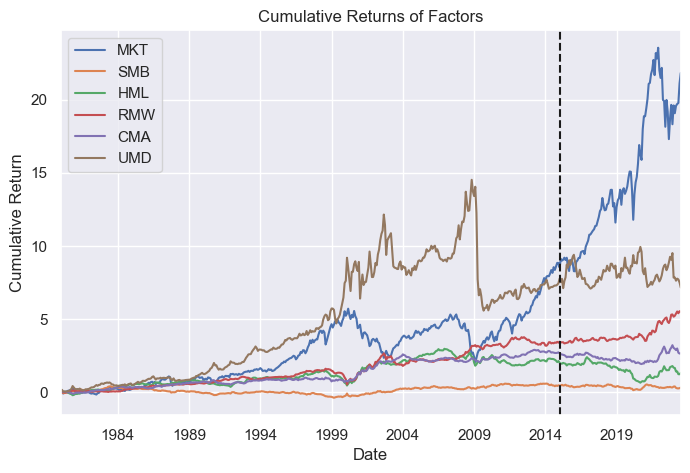

In [20]:
pre_case = performance_summary(factors.loc[:'2014'])[['Mean', 'Volatility', 'Sharpe Ratio']]
post_case = performance_summary(factors.loc['2015':])[['Mean', 'Volatility', 'Sharpe Ratio']]

#将时期前和后的值放在一起比较
pre_post = pre_case.join(post_case, lsuffix=' Pre', rsuffix=' Post')
display(pre_post)

# Plot cumulative returns of factors, add vertical line at 2015
fig, ax = plt.subplots(figsize=(8, 5))
cum_rets = (1 + factors).cumprod() - 1
cum_rets.plot(ax=ax)
ax.axvline('2015', color='k', linestyle='--')
ax.set_title('Cumulative Returns of Factors')
ax.set_ylabel('Cumulative Return')
ax.set_xlabel('Date');

MKT has done by far the best, and has been soaring up compared to the other factors, especially after the case. UMD has stayed around flat after the case, although it did well before the case. SMB and HML go from positive expected returns to negative.

Overall, all of the factors except MKT and RML do worse after the case than before the case.

## 2.3 Report the correlation matrix across the six factors.

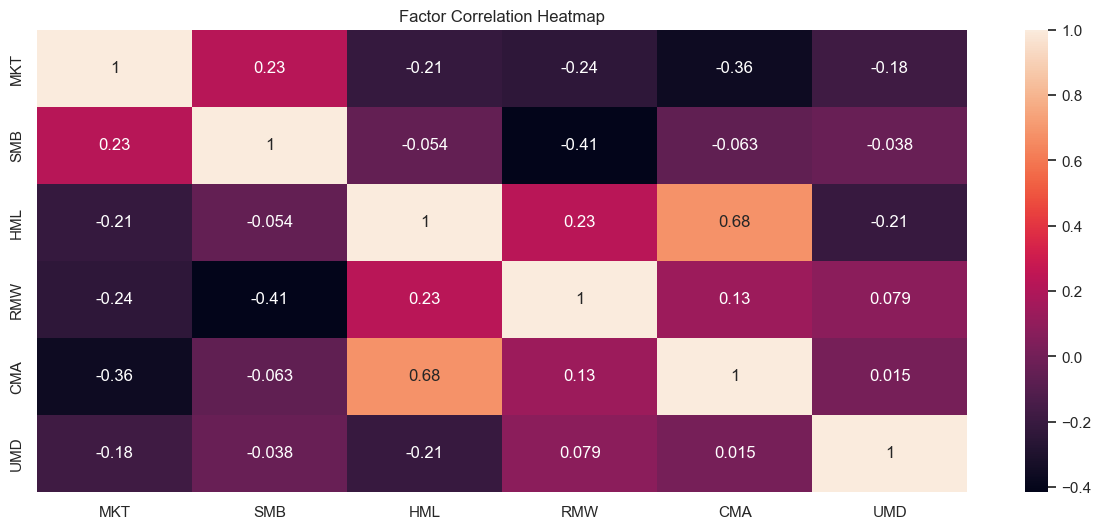

In [382]:
sns.heatmap(factors.corr(), annot= True)
plt.title('Factor Correlation Heatmap')
plt.show()

### (a) Does the construction method succeed in keeping correlations small?

The construction method is pretty effective in keeping correlations small. Most correlations are pretty small (close to 0) with the largest correlation at .68 between HML and CMA. The value and investment factors. This is consistent with the belief that firms with high B/M ratios tend to be firms with conservative investment strategies. Moreover, a lot of them have negative correlations, which is interesting. RMW and SMB also have a -0.41 correlation, which is somewhat high.

### (b) Fama and French say that HML is somewhat redundant in their 5-factor model. Does this seem to be the case?

HML has relatively low correlations with the other factors, outside of CMA (the investment factor). We can suspect it to be somewhat redundant, and possible introduce multicollinearity into our model. This could in turn result in a low beta for HML. We conclude that it might be redundant in the 5-factor model. I would say so. Given the high correlation HML has to CMA and moderate correlation is has to RMW then it is likely that HML is picking up on something similar to CMA. So, out of all of the factors, it could be the most redundant.

## 2.4 Report the tangency weights for a portfolio of these 6 factors.

In [52]:
mean_ret = factor_summary['Mean']
tan_weights = tangency_portfolio_rfr(mean_ret, factors.cov())
tan_weights = pd.DataFrame(tan_weights, index = factors.columns, columns = ['Tangent Weights'])
#put mean and tangent weights together 
tan_mean_weights = pd.concat([tan_weights.T, factor_summary[['Mean']].T]).T
tan_mean_weights

,Tangent Weights,Mean
MKT,0.2039,0.0846
SMB,0.0874,0.0112
HML,-0.0618,0.0253
RMW,0.3074,0.0465
CMA,0.3693,0.0325
UMD,0.0938,0.0609


### (a) Which factors seem most important? And Least?

MKT, RMW (profitability), and CMA (investment) are most important with the majority of the tangency weights. HML (value) is the least important, shown as a negative weighting in the tangent portfolio.

### (b) Are the factors with low mean returns still useful?**

Yes. In the graph on the left RMW and CMA have low mean returns compared to MKT, or even UMD, but end up getting large tangent portfolio weightings due to their low correlation with the other factors in our portfolio. SMB carries very small returns but still gets a noteworthy weighting in our tangent portfolio.

#### This again goes back to the fact that when doing MV-optimization, we are not just looking at mean returns, but also covariances.



In [53]:
factor_summary_x = performance_summary(factors[['MKT', 'SMB', 'HML', 'UMD']])
mean_ret_x = factor_summary_x['Mean']
tan_weights_x = tangency_portfolio_rfr(mean_ret_x, factors[['MKT', 'SMB', 'HML', 'UMD']].cov())
tan_weights_x = pd.DataFrame(tan_weights_x, index = factors[['MKT', 'SMB', 'HML', 'UMD']].columns, columns = ['Tangent Weights'])
tan_mean_weights_x = pd.concat([tan_weights_x.T,factor_summary_x[['Mean']].T]).T
tan_mean_weights_x = tan_mean_weights_x.sort_values('Tangent Weights', ascending=False)
tan_mean_weights_x

,Tangent Weights,Mean
MKT,0.3564,0.0846
HML,0.3489,0.0253
UMD,0.3009,0.0609
SMB,-0.0062,0.0112


### (c) Re-do the tangency portfolio, but this time only include MKT, SMB, HML, and UMD. Which factors get high/low tangency weights now?

We see that MKT, HML, UMD all get large and relatively equal tangency weightings, while SMB the size factor gets a slight short weighting. 




### What do you conclude about the importance or unimportance of these styles?**

Now MKT, HML, and UMB all have roughly equal and high weights, and SMB has virtually 0 weight. SO, I would conclude that SMB is probably not super important, and that MKT, HML, and UMB are all important.

- Relative importance of factors changes over time but have in general maintained positive risk premia
- Construction of factors keeps correlation among them low for the most part 
- These style factors can come in handy for a LFD and in a LPM, as long as combination of factors do not have large correlations
- As technology advances and investor behavior reacts, some factors might prove to be redundant because of high correlation (HML/ CMA) or might not continue to have positive risk premia for long durations

# 3. Testing Modern LPMs

Consider the following factor models:

- CAPM: MKT
- Fama-French 3F: MKT, SMB, HML
- Fama-French 5F: MKT, SMB, HML, RMW, CMA
- AQR: MKT, HML, RMW, UMD

For instance for the AQR model:

> $\mathbb{E}[\tilde{r}^i] = \beta^{i, MKT}\tilde{f}_t^{MKT} + \beta^{i, HML}\tilde{f}_t^{HML} + \beta^{i, RMW}\tilde{f}_t^{RMW} + \beta^{i, UMD}\tilde{f}_t^{UMD} + \epsilon_t$

We will test these models with the time-series regressions. Namely, for each asset $i$, estimate the following regression to test the AQR model:

> $\tilde{r}_t^i = \alpha^i + \beta^{i, MKT}\tilde{f}_t^{MKT} + \beta^{i, HML}\tilde{f}_t^{HML} + \beta^{i, RMW}\tilde{f}_t^{RMW} + \beta^{i, UMD}\tilde{f}_t^{UMD} + \epsilon_t$

So you are running that regression n times, once for each security, $\tilde{r}^i$.\
Data
- PORTFOLIOS: Monthly **excess** return data on 49 equity portfolios sorted by their industry. Denote these as $\tilde{r}$ , for $ n = 1, . . . , 49$.
- You do NOT need the risk-free rate data. It is provided only for completeness. The other two tabs are already in terms of excess returns.

## 3.1 Test the AQR 4-Factor Model using the time-series test. (We are not doing the cross-sectional regression tests.)
### (a) For each regression, report the estimated $\alpha$ and $R^2$**\
### (b) Calculate the mean-absolute error of the estimated alphas, (one for each security, $\tilde{r}^i$.)**
> MAE $= \frac{1}{n}\sum_{i=1}^{n}{|\hat{\alpha}^i|}$

### If the pricing model worked, should these alpha estimates be large or small? Why? Based on your MAE stat, does this seem to support the pricing model or not?**

In [61]:
def time_series_regression(portfolio, factors, resid = False, scale =12):
    '''
    Input portfolio (columns of funds to be regressed), and factors.
    This function returns the portfolio columns as index, and regression estimates as columns
    Function includes betas for anything included in factors
    If resid = True, then we return the residual of each column in portfolio indexed by time
    '''
    
    report = pd.DataFrame(index = portfolio.columns)
    residual = pd.DataFrame(columns= portfolio.columns)

    for col in portfolio.columns:
        fund_ret = portfolio[col]
        model = sm.OLS(fund_ret, sm.add_constant(factors), missing= 'drop').fit()
        report.loc[col, 'Mean Return'] = scale * fund_ret.mean()
        report.loc[col, 'Sharpe Ratio'] = np.sqrt(scale) * fund_ret.mean() / fund_ret.std()
        report.loc[col, 'Alpha'] = model.params['const']
        for i, factor in enumerate(factors.columns):
            report.loc[col, f'{factor} Beta'] = model.params[i + 1]
        report.loc[col, 'Information Ratio'] = np.sqrt(scale) * model.params['const'] / model.resid.std()
        report.loc[col, 'Treynor Ratio'] = scale * portfolio[col].mean() / model.params[1]
        report.loc[col, 'R-Squared'] = model.rsquared
        report.loc[col, 'Tracking Error'] = (model.resid.std()*np.sqrt(scale))  
        if resid:
            residual[col] = model.resid
    if resid:
        return residual
    return report

In [69]:
def calculate_mae(regression_result, scale = 12):
    return round(abs(regression_result['Alpha']).mean()*scale, 6)

In [80]:
AQR = factors[['MKT', 'HML', 'RMW', 'UMD']]
AQR_regression = time_series_regression(portfolios,AQR)
print(f'Mean Absolute Error for AQR Factors: {calculate_mae(AQR_regression)}')
AQR_regression[['Alpha', 'R-Squared']]

Mean Absolute Error for AQR Factors: 0.022995


,Mean Return,Sharpe Ratio,Alpha,MKT Beta,HML Beta,RMW Beta,UMD Beta,Information Ratio,Treynor Ratio,R-Squared,Tracking Error
Agric,0.0897,0.4125,0.0008,0.8378,0.1787,-0.0064,0.0841,0.0538,0.1071,0.3413,0.1765
Food,0.0997,0.6600,0.0010,0.6809,0.1698,0.5074,0.0451,0.1041,0.1464,0.4711,0.1098
Soda,0.1088,0.4910,0.0016,0.7847,0.2061,0.4947,-0.0871,0.1060,0.1387,0.3072,0.1845
Beer,0.1194,0.7007,0.0020,0.7233,0.0252,0.6006,0.0903,0.1873,0.1651,0.4267,0.1291
Smoke,0.1329,0.5923,0.0029,0.7372,0.2493,0.6574,-0.0268,0.1845,0.1803,0.2726,0.1914
Toys,0.0629,0.2522,-0.0027,1.1168,-0.0353,0.2308,-0.1502,-0.1843,0.0564,0.5103,0.1746
Fun,0.1182,0.4461,0.0026,1.2489,0.0002,-0.1095,-0.2308,0.1938,0.0947,0.6173,0.1640
Books,0.0741,0.3580,-0.0025,1.1136,0.2655,0.1779,-0.0774,-0.2629,0.0666,0.6897,0.1153
Hshld,0.0815,0.5292,-0.0005,0.7528,0.0009,0.4851,0.0132,-0.0539,0.1083,0.5603,0.1022
Clths,0.0981,0.4374,-0.0010,1.1186,0.0495,0.5650,-0.2023,-0.0861,0.0877,0.6318,0.1361


If the pricing model worked, the alpha estimate should be very small and close to zero. This is due to the fact that we assume the factors sufficient in explain most of the variation in excess portfolio return. 

An MAE statistics of 2.3% is large, the alpha is pretty large. This does not support the pricing model. We could also run a t-test to see if the difference is statistically significant.

### 3.2 Test the CAPM, FF 3-Factor Model, and the FF 5-Factor Model. Report the MAE statistic for each of these models and compare it with the AQR Model MAE. Which model fits best?**

In [82]:
CAPM = factors[['MKT']]
FF3 = factors[['MKT', 'SMB', 'HML']]
FF5 = factors[['MKT', 'SMB', 'HML', 'RMW', 'CMA']]
CAPM_regression = time_series_regression(portfolios, CAPM)
FF3_regression = time_series_regression(portfolios, FF3)
FF5_regression = time_series_regression(portfolios, FF5)
mae_df = pd.DataFrame({
    'Model': ['CAPM', 'FF3', 'FF5', 'AQR'],
    'MAE': [calculate_mae(CAPM_regression), calculate_mae(FF3_regression), calculate_mae(FF5_regression), calculate_mae(AQR_regression)]
})
mae_df = mae_df.set_index('Model')
mae_df

,MAE
Model,
CAPM,0.0206
FF3,0.0242
FF5,0.0313
AQR,0.0230


CAPM Factor model fits best with the smallest MAE, but we are able to include more factors with AQR and only marginally increase or MAE. I think AQR does the best job at capturing the relationship with minimal error.

### 3.3 Does any particular factor seem especially important or unimportant for pricing? Do you think Fama and French should use the Momentum Factor?**

It's hard to say. All of the models perform worse than the CAPM, so in some sense the only important factor is MKT. However, AQR performs second best, which further indicates that HML or CMA are redundant and should not be used. Yes, Fama and French should probably add the momentum factor to their model.

We see in going from 3 to 5 factors in the Fama French model, MAE worsens by a good amount. This is indicative of the idea that HML (value factor) is not an especially important factor, especially when CMA is included as a factor.

Observing AQR with a lower MAE than FF3 leads me to think that UMD could be an important factor. It seems that Fama and French should use the momentum factor. 

### 3.4 This does not matter for pricing, but report the average (across n estimations) of the time-series regression $R^2$ statistics. Do this for each of the three models you tested. Do these models lead to high time-series $R^2$ stats? That is, would these factors be good in a Linear Factor Decomposition of the assets?**

In [72]:
r2_df = pd.DataFrame({
                      'Model': ['CAPM', 'FF3', 'FF5', 'AQR'],
                      'Avg R-Sq': [CAPM_regression['R-Squared'].mean(),FF3_regression['R-Squared'].mean(),
                                   FF5_regression['R-Squared'].mean(), AQR_regression['R-Squared'].mean()]
                    })
r2_df = r2_df.set_index('Model')
r2_df

,Avg R-Sq
Model,
CAPM,0.5281
FF3,0.5725
FF5,0.5975
AQR,0.5771


Very similar $R^2$ stats for each of the three models being tested. While roughly 60% is a pretty good fit of these factors as a linear factor decomposition, it does indicate there are possibly other factors out there that can provide more explanatory power in the variation in returns. 

Not particularly. They only explain about 50-60% of the variation. This indicates moderately low explainability of excess returns by decomposition on different factor models. Thus the factors may not be considered good in a Linear Factor Decomposition of the assets.

#### 证明了good linear factor pricing model 不代表 good linear factor decomposition

## 3.5 We tested three models using the time-series tests (focusing on the time-series alphas.) Re-test these models, but this time use the cross-sectional test.

### (a) Report the time-series premia of the factors (just their sample averages,) and compare to the cross-sectionally estimated premia of the factors. Do they differ substantially?

### (b) Report the MAE of the cross-sectional regression residuals for each of the four models, (the $v_i$.) How do they compare to the MAE of the time-series alphas?

In [76]:
mean_ex_ret = factor_summary[['Mean']]
mean_ex_ret = mean_ex_ret.rename(columns={'Mean': 'Time Series Premia'})
mean_ex_ret.index = [x + ' Beta' for x in mean_ex_ret.index]
AQR_mean = AQR_regression[['Mean Return']]
AQR_beta = AQR_regression[['MKT Beta', 'HML Beta', 'RMW Beta', 'UMD Beta']]
FF3_mean = FF3_regression[['Mean Return']]
FF3_beta = FF3_regression[['MKT Beta', 'SMB Beta', 'HML Beta']]
FF5_mean = FF5_regression[['Mean Return']]
FF5_beta = FF5_regression[['MKT Beta', 'SMB Beta', 'HML Beta', 'RMW Beta', 'CMA Beta']]

In [84]:
def perform_cross_sectional_regression(mean_data, beta_data, model_name):
    CS_result = sm.OLS(mean_data, beta_data, missing='drop').fit()
    CS_MAE = abs(CS_result.resid).mean()
    CS_premia = CS_result.params.to_frame(f'{model_name} Premia')
    return CS_result, CS_MAE, CS_premia

def process_data_regression(mean_data, beta_data, model_name):
    CS_result, CS_MAE, premia = perform_cross_sectional_regression(mean_data, beta_data, model_name)
    premia.rename(index=lambda x: x.replace(f' {model_name} Beta', f' {model_name}'), inplace=True)
    return CS_result, CS_MAE, premia


#premia 就是beta的值（就是mean是左边，右边是之前算出来的几个factor的beta值，用beta的值作为regressor来算beta --> premia
AQR_CS, AQR_CS_MAE, AQR_CS_premia = process_data_regression(AQR_mean, AQR_beta, 'AQR')
FF3_CS, FF3_CS_MAE, FF3_CS_premia = process_data_regression(FF3_mean, FF3_beta, 'FF3')
FF5_CS, FF5_CS_MAE, FF5_CS_premia = process_data_regression(FF5_mean, FF5_beta, 'FF5')

cs_premia = pd.concat([mean_ex_ret, AQR_CS_premia, FF3_CS_premia, FF5_CS_premia], axis = 1).fillna('')
display(cs_premia)


cs_mae = pd.Series([AQR_CS_MAE, FF3_CS_MAE, FF5_CS_MAE], index = ['AQR', 'FF3', 'FF5'])
mae_ts = mae_df.loc[['AQR', 'FF3', 'FF5']]
mae = pd.concat([mae_ts, cs_mae], axis = 1)
mae.columns = ['Time Series MAE', 'Cross Section MAE']
display(mae)

,Time Series Premia,AQR Premia,FF3 Premia,FF5 Premia
MKT Beta,0.0846,0.0876,0.1016,0.0957
SMB Beta,0.0112,,-0.0646,-0.0577
HML Beta,0.0253,-0.0398,-0.0175,-0.0335
RMW Beta,0.0465,0.0444,,0.0359
CMA Beta,0.0325,,,-0.0152
UMD Beta,0.0609,0.0534,,


,Time Series MAE,Cross Section MAE
AQR,0.0230,0.0164
FF3,0.0242,0.0150
FF5,0.0313,0.0130


- Differences in the Time Series and cross section premia are generally not extremely large except for a few pairs. Some large differences of HML the value factor's premia in every model, and between CMA and the FF5 model. This probably has to do with the high correlation of CMA and HML as mentioned previously
    
       For MKT, they don't differ that much. Likewise, for UMD and RMW, there isn't a huge difference. However, for SMB, HML, and CMA, there is a big difference, where a lot of the estimated premia are negative!

- Cross section MAE is generally lower than the MAE of the time series regressions.

### Time-series test vs. Cross-sectional test
- time series test: fits the asset, insist the factor premia for each factor are sample averages, only requires Alpha, R^2 not important 
- cross sectional test: fits the asset looser, let factor premia (lambda) be whatever value to fit the model better, cares about R^2

#### time series test has higher error with more parameters 
time-series test has higher error 因为harder to fit with multiple parameters

(no garantee alpha must be zero, no garantee do better in time series test when num of parameters increase) 

#### cross sectional test has lower error, higher R^2 with more parameters
fit the data better when number of parameters increase，因为可以随意组合，取任意值





# Testing code not for grade

In [394]:
# Original code before functionalizing
def f():
    AQR_mean = AQR_regression[['Mean Return']]
    AQR_beta = AQR_regression[['MKT Beta', 'HML Beta', 'RMW Beta', 'UMD Beta']]
    AQR_CS = sm.OLS(AQR_mean, AQR_beta, missing = 'drop').fit()
    AQR_CS_MAE = abs(AQR_CS.resid).mean()
    AQR_CS_premia = AQR_CS.params.to_frame('AQR CS Premia')

    FF3_mean = FF3_regression[['Mean Return']]
    FF3_beta = FF3_regression[['MKT Beta', 'SMB Beta', 'HML Beta']]
    FF3_CS = sm.OLS(FF3_mean, FF3_beta, missing = 'drop').fit()
    FF3_CS_MAE = abs(FF3_CS.resid).mean()
    FF3_CS_premia = FF3_CS.params.to_frame('FF3 CS Premia')

    FF5_mean = FF5_regression[['Mean Return']]
    FF5_beta = FF5_regression[['MKT Beta', 'SMB Beta', 'HML Beta', 'RMW Beta', 'CMA Beta']]
    FF5_CS = sm.OLS(FF5_mean, FF5_beta, missing = 'drop').fit()
    FF5_CS_MAE = abs(FF5_CS.resid).mean()
    FF5_CS_premia = FF5_CS.params.to_frame('FF5 CS Premia')

    cs_premia = pd.concat([mean_ex_ret, AQR_CS_premia, FF3_CS_premia, FF5_CS_premia], axis = 1).fillna('')
    display(cs_premia)
    cs_mae = pd.Series([AQR_CS_MAE, FF3_CS_MAE, FF5_CS_MAE], index = ['AQR', 'FF3', 'FF5'])
    mae_ts = mae_df.T[['AQR', 'FF3', 'FF5']].T
    mae = pd.concat([mae_ts, cs_mae], axis = 1)
    mae.columns = ['Time Series MAE', 'Cross Section MAE']
    display(mae)
f()

,Time Series Premia,AQR CS Premia,FF3 CS Premia,FF5 CS Premia
MKT Beta,0.084562,0.087644,0.101569,0.095697
SMB Beta,0.011206,,-0.064615,-0.057674
HML Beta,0.025324,-0.039757,-0.017476,-0.033504
RMW Beta,0.046525,0.044399,,0.035899
CMA Beta,0.032492,,,-0.015156
UMD Beta,0.060925,0.053375,,


,Time Series MAE,Cross Section MAE
AQR,0.022995,0.016395
FF3,0.024200,0.015031
FF5,0.031272,0.012982


In [396]:
# Do we include an intercept in CS regression??? If so, this is what we should do
# Last year solutions no intercept included

def process_regression_results(mean_data, beta_data, model_name):
    CS_result = time_series_regression(mean_data, beta_data)
    beta_columns_range = [i for i, col in enumerate(CS_result.columns) if col.endswith('Beta')]
    CS_MAE = calculate_mae(CS_result)
    premia = CS_result.iloc[:, beta_columns_range].T
    premia.rename(index=lambda x: x.replace(' Beta Beta', ' Beta'), inplace=True)
    premia.columns = [f'{model_name} CS Premia' for col in premia.columns]  # Rename columns with model name
    return CS_result, CS_MAE, premia

AQR_CS, AQR_CS_MAE, AQR_premia = process_regression_results(AQR_mean, AQR_beta, 'AQR')
FF3_CS, FF3_CS_MAE, FF3_premia = process_regression_results(FF3_mean, FF3_beta, 'FF3')
FF5_CS, FF5_CS_MAE, FF5_premia = process_regression_results(FF5_mean, FF5_beta, 'FF5')

cs2_premia = pd.concat([mean_ex_ret, AQR_premia, FF3_premia, FF5_premia], axis = 1).fillna('')
display(cs_premia)
cs_mae = pd.Series([AQR_CS_MAE, FF3_CS_MAE, FF5_CS_MAE], index = ['AQR', 'FF3', 'FF5'])
mae_ts = mae_df.T[['AQR', 'FF3', 'FF5']].T
mae = pd.concat([mae_ts, cs_mae], axis = 1)
mae.columns = ['Time Series MAE', 'Cross Section MAE']
display(mae2)

,Time Series Premia,AQR Premia,FF3 Premia,FF5 Premia
MKT Beta,0.084562,0.087644,0.101569,0.095697
SMB Beta,0.011206,,-0.064615,-0.057674
HML Beta,0.025324,-0.039757,-0.017476,-0.033504
RMW Beta,0.046525,0.044399,,0.035899
CMA Beta,0.032492,,,-0.015156
UMD Beta,0.060925,0.053375,,


,Time Series MAE,Cross Section MAE
AQR,0.022995,0.857176
FF3,0.024200,0.742464
FF5,0.031272,0.633195


# 4 Extensions
*This section will not be graded, but it will be discussed in class.*

**4.1 Using the LPM.**

**Let’s use the AQR model in (1) for forecasting excess returns. We will do this at each point in time to build a point-in-time series of forecasts. We will then see how well they perform.**

- **The model does not give us any info about forecasting the factors themselves. Accordingly, calculate the “expanding” mean of the four factors. We will use these as our point-in-time factor premia.**

- **For each of the n securities, estimate (2) over a window of 60 months. Make sure to estimate these rolling regressions WITH an intercept. But we only need to save the beta estimates.**

- **For every security, i, and at every month, t (after the first 60), calculate (1) using the point-in-time factor premia and betas calculated in the prior two steps. This is your forecast made at the end of period t, for $\tilde{r}_{t+1}^i$. You are using end-of-time t info iin the estimation, so it is a forecast for $t+1$. In order to better align it with our data, shift it ahead a time period. So the dataframe of forecasts has been pushed one month later. (The Feb value is now a March value.) This is your forecasted table for $\tilde{r}_t^i$. Denote these as $\widehat{\tilde{r}_t^i}$.**

- **In order to decide if these forecasts are good, we need a comparison. Use the point-in-time mean estimates of $\tilde{r}_t^i$. So calculate the expanded mean, and once again, be sure to shift them one period into the future. This gives us the benchmark forecast: $\overline{\tilde{r}_t^i}$**

**Compare our LFP forecasts with the naïve forecasts using Out-of-sample (OOS) $R^2$.**
> $$\textnormal{OOS }R^2 = 1 - \frac{\textnormal{MSE}_\textnormal{forecast}}{\textnormal{MSE}_\textnormal{baseline}}$$

**where MSE stands for Mean Squared Error. Thus,**

> $$\textnormal{MSE}_\textnormal{forecast} \equiv{\textnormal{ sample average of } [(\widehat{\tilde{r}_t^i} - \tilde{r}_t^i)^2]}$$
> $$\textnormal{MSE}_\textnormal{baseline} \equiv{\textnormal{ sample average of } [(\overline{\tilde{r}_t^i} - \tilde{r}_t^i)^2]}$$

**Warning ! This calculation will be wrong if your forecasts have NaN values where the benchmark does not. For this reason, it is important to eliminate any data where either series has an NaN value. If you are careful about this issue, then you can write the OOS $R^2$ as a ratio of SSE:**

> $$\textnormal{OOS} R^2 = 1 - \frac{\textnormal{SSE}_\textnormal{forecast}}{\textnormal{SSE}_\textnormal{baseline}} $$
> $$ = 1 - \frac{\sum_t{(\widehat{\tilde{r}_t^i} - \tilde{r}_t^i)^2}}{\sum_t{(\overline{\tilde{r}_t^i} - \tilde{r}_t^i)^2}}$$

**(a) Report the OOS $R^2$ for each of the n security forecasts.**

**(b) Does the LPM do a good job of forecasting monthly returns? For which asset does it perform best? And worst?**

**(c) Re-do the exercise using a window of 36 months. And 96 months. Do either of these windows work better?**

**(d) Re-do the exercise using the FF 5-Factor Model instead of the AQR model. Re-do it with the CAPM. Do either of these models improve on forecasting?**